In [ ]:
plt.hist?
sns.histplot?
plt.boxplot?
sns.boxplot?
sns.violinplot?
plt.scatter?
sns.scatter?
sns.regplot?

Signature:
sns.violinplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    inner='box',
    split=False,
    width=0.8,
    dodge='auto',
    gap=0,
    linewidth=None,
    linecolor='auto',
    cut=2,
    gridsize=100,
    bw_method='scott',
    bw_adjust=1,
    density_norm='area',
    common_norm=False,
    hue_norm=None,
    formatter=None,
    log_scale=None,
    native_scale=False,
    legend='auto',
    scale=<deprecated>,
    scale_hue=<deprecated>,
    bw=<deprecated>,
    inner_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Draw a patch representing a KDE and add observations or box plot statistics.

A violin plot plays a similar role as a box-and-whisker plot. It shows the
distribution of data points after grouping by one (or more) variables.
Unlike a box plot, each violin is drawn using a kernel density estimate
of the underlying dist

## ANÁLISIS DEPENDIENDO DEL TIPO DE VARIABLE

Los análisis univariables, bivariables y multivariables usan diferentes técnicas dependiendo del tipo de variables: numéricas y categóricas:


- Variables Categóricas
    - Análisis Univariable:
        - Conteo de frecuencias con gráficos de barras --> <u>COUNTPLOT</u>   ***Solo Seaborn*** (*En matplotlib se puede hacer pero hay que hacer un nuevo df con una columna con la variable y otra columna con los conteos*)
        - Porcentaje o proporciones --> <u>PIEPLOT</u> **Solo Matplotlib**
        - Descriptivos: 
            - Tabla frecuencia absoluta/Relativa
            - Moda

    - Análisis Bivariable:
        - Gráficos de barras --> <u>COUNTPLOT</u>
        - Tablas de contingencia --> <u>CROSSTAB</u>
    - Análisis Multivariable
  
- Variables Numéricas:
    - Análisis Univariable:
        - Conteo de frecuencias con grafico de barras usando rangos, para ver la distribución: --> <u>HISTOGRAMAS</u>
        - Análisis distribución, haciendo especial enfoque en detección de valores atípicos --> <u>BOXPLOT/VIOLINPLOT</u>
        - Descriptivos:
            - Media
            - Mediana
            - Desviacion tipica/varianza 
    - Análisis Bivariable:
        - Gráficos de dispersión / regresion--> <u>SCATTERPLOG/REGPLOT</u>
        - Matriz correlación --> <u>HEATMAP</u>

    - Análisis Multivariable
      

- Relación variables categóricas y numéricas
  - Análisis distribución, haciendo especial enfoque en detección de valores atípicos, para ver como se distribuye una variable numerica dentro de cada categoría de una variable categórica --> <u>BOXPLOT/VIOLINPLOT</u>
  - Calculo medida variables numéricas (media, mediana...) para diferentes categorías --> <u>BARPLOT</u>

- Analisis temporales --> <u>LINEPLOT</u>

## CATEGORICAS

# Análisis de variables categóricas o relación entre variables categóricas

Al igual que con las variables numéricas, vamos a plantear una serie de preguntas para aprender a usar este tipo de gráficas. Las preguntas son:


- ¿Cuál es el nivel educativo (`education`) más común? Con esta pregunta podremos saber que perfil educativo domina más entre nuestros clientes. 


- ¿Depende el nivel educativo de los clientes en que acepten o no una oferta (`y`)? En este caso podríamos ver que tipo de clientes aceptan o no la oferta. 


- ¿Depende el hecho de haber aceptado o no una oferta en el pasado (`poutcome`) en que acepten o no una oferta (`y`)? En este caso podríamos ver que tipo de clientes aceptan o no la oferta. 



In [99]:
# Parametros vis

In [100]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [101]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("bank-additional-clean-nonulls.csv") 
df.head(2)

,income,kidhome,teenhome,dt customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,emp var rate,cons price idx,cons conf idx,nr employed,y,date,latitude,longitude,age,euribor3m
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191.0,no,2019-08-02,41.495,-71.233,39.0,4.8570
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191.0,no,2016-09-14,34.601,-83.923,57.0,4.7866


## Countplot

Es una visualización específica que se utiliza para mostrar la frecuencia de observaciones en diferentes categorías. Este tipo de gráfico es especialmente útil cuando deseas contar y comparar cuántas veces aparece cada categoría en una variable categórica. 

La sintaxis del `countplot` de Seaborn es bastante sencilla. Aquí tienes la estructura básica:

```python
sns.countplot(x, data, palette, color, hue, orient)
```
Donde:

- `x`: Es el nombre de la columna que contiene las categorías que deseas contar.

- `data`: Es el DataFrame o conjunto de datos con el que estamos trabajando.

- `palette` (opcional): Es un argumento que te permite especificar la paleta de colores a utilizar en el gráfico.

- `color`(opcional): Indicamos de que color queremos que sean las barras.

- `hue` (opcional): Permite agregar otra variable categórica para diferenciar aún más las barras.

- `order y hue_order` (opcional): Te permiten definir el orden en el que se muestran las categorías en el eje X.

- `orient` (opcional): Puedes cambiar la orientación de las barras (horizontal o vertical).

Para empezar a familiarizarnos con este tipo de gráfica vamos a contestar a la siguiente pregunta: 

> ¿Cuál es el nivel educativo (`education`) más común? Con esta pregunta podremos saber que perfil educativo domina más entre nuestros clientes. 

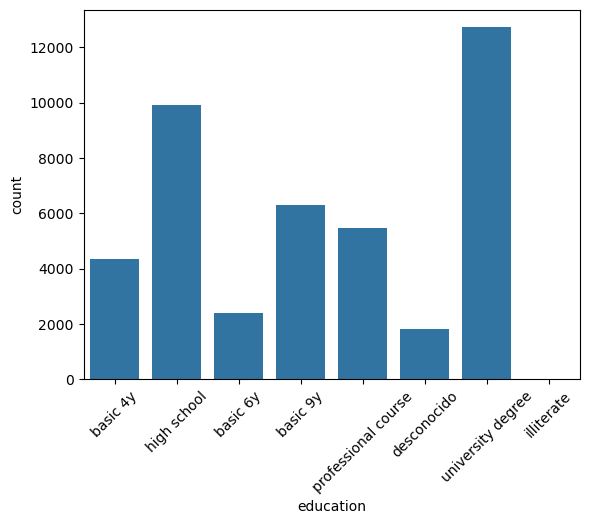

In [102]:
sns.countplot(data = df, x='education')
plt.xticks(rotation = 45);

In [103]:
orden_education = df['education'].value_counts().index

In [104]:
orden_education[::-1]

Index(['illiterate', 'desconocido', 'basic 6y', 'basic 4y',
       'professional course', 'basic 9y', 'high school', 'university degree'],
      dtype='object', name='education')

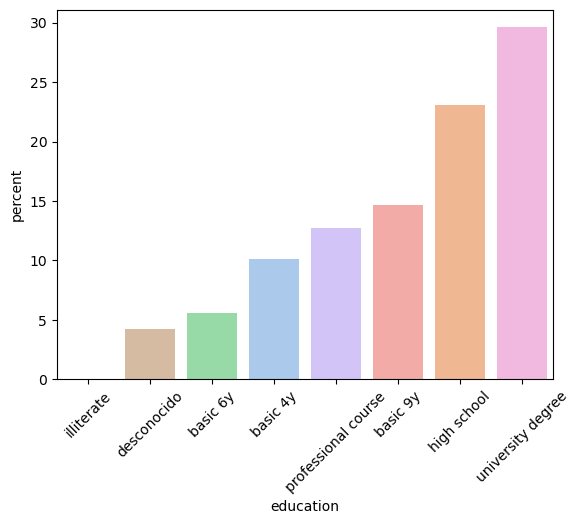

In [105]:
sns.countplot(data=df, x = 'education', hue='education', palette='pastel', stat='percent', order=orden_education[::-1])
plt.xticks(rotation = 45);

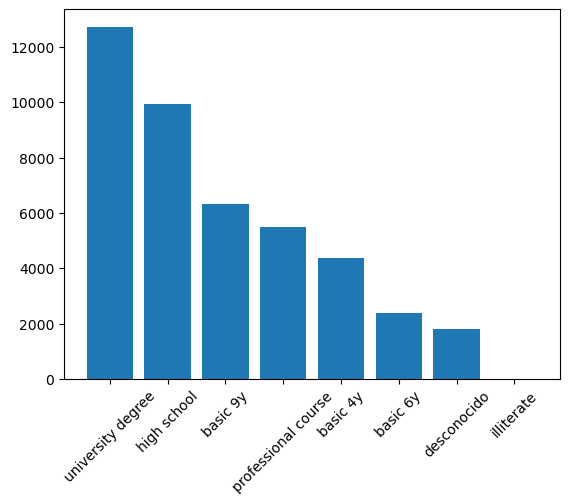

In [106]:
df_para_countplot = df['education'].value_counts().reset_index()
df_para_countplot

plt.bar(data=df_para_countplot, x = 'education', height='count')
plt.xticks(rotation = 45);

Lo primero que vamos a hacer es rotar las etiquetas del eje x, para que las podamos leer mejor. Para usaremos el método `plt.xticks()`.  Se utiliza para personalizar las marcas (etiquetas) en el eje X de un gráfico. Entre otras cosas, permite especificar las ubicaciones y las etiquetas que deseamos mostrar en el eje X. Esto es útil cuando deseas ajustar cómo se muestran los valores en el eje X para que sean más legibles o para resaltar ciertas categorías. También nos puede ayudar a rotar las etiquetas, lo cual es nuestro objetivo. 

La sintaxis básica de `plt.xticks()` es la siguiente:

```python
# en caso de que estemos trabajando con gráficas individuales
plt.xticks(ticks, labels, rotation) # para modific9ar el eje x
plt.yticks(ticks, labels, rotation) # para modificar el eje y

# al igual que en los otros métodos, cuando queremos incluirlo en subplots es un poco diferente, en este caso usaremos:
axes[n].set_xticks()
axes[n].set_yticks()
```
Donde: 

- `ticks`: Es una lista o array que contiene las posiciones en el eje X donde deseas colocar las marcas. Pueden ser números que representen las ubicaciones de las categorías.

- `labels`: Es una lista o array que contiene las etiquetas que deseas mostrar en las marcas del eje X, correspondientes a las posiciones especificadas en `ticks`.

- `rotation`: Valor numérico que representa el ángulo de rotación en grados de las etiquetas. Puedes usar valores positivos (rotación en sentido de las agujas del reloj) o negativos (rotación en sentido contrario a las agujas del reloj).


In [107]:
orden_education

Index(['university degree', 'high school', 'basic 9y', 'professional course',
       'basic 4y', 'basic 6y', 'desconocido', 'illiterate'],
      dtype='object', name='education')

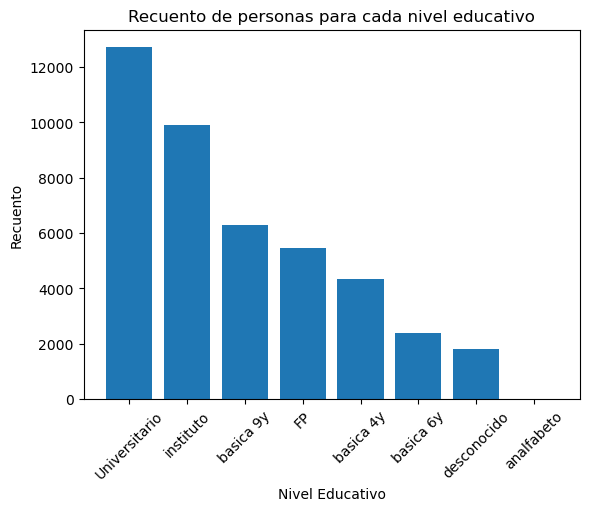

In [108]:
df_para_countplot = df['education'].value_counts().reset_index()
df_para_countplot
labels=['Universitario', 'instituto', 'basica 9y', 'FP', 'basica 4y', 'basica 6y', 'desconocido', 'analfabeto']

plt.bar(data=df_para_countplot, x = 'education', height='count')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation = 45)

plt.xlabel('Nivel Educativo')
plt.ylabel('Recuento')
plt.title('Recuento de personas para cada nivel educativo')
plt.show()


## Pieplot o Gráfico de quesitos

Es un tipo de gráfico utilizado para mostrar la proporción de diferentes partes en relación con un todo. Se representa como un círculo dividido en sectores, donde cada sector representa una categoría y su tamaño angular está en proporción a la cantidad que representa dentro del conjunto total.

Sintaxis básica de un pie chart utilizando la librería Matplotlib (**en seaborn no tenemos este tipo de gráfico**):

```python
plt.pie(valores, labels, autopct, startangle, data, colors)
```
En este ejemplo:

- `etiquetas`: Es la columna que contiene las etiquetas de cada sector del gráfico.

- `valores`: Es la columna que contiene los valores numéricos de cada sector.

- `autopct` (opcional): Agrega los porcentajes en cada sector con un formato específico.

- `startangle` (opcional): controla el ángulo desde donde comienza el primer sector.

- `data`: El DataFrame del que provienen los datos.

- `colors` (opcional): Debe ser una lista con los colores que le queremos dar a cada una de las categorías.

- `textprops` (opcional): Debe ser un diccionario, nos permite cambiar el tamaño y tipo de la letra.



In [109]:
df_recuento = df['education'].value_counts().reset_index()
df_recuento_2 = df.groupby('education')['id'].count().reset_index()

In [110]:
df_recuento

,education,count
0,university degree,12722
1,high school,9925
2,basic 9y,6309
3,professional course,5477
4,basic 4y,4356
5,basic 6y,2386
6,desconocido,1807
7,illiterate,18


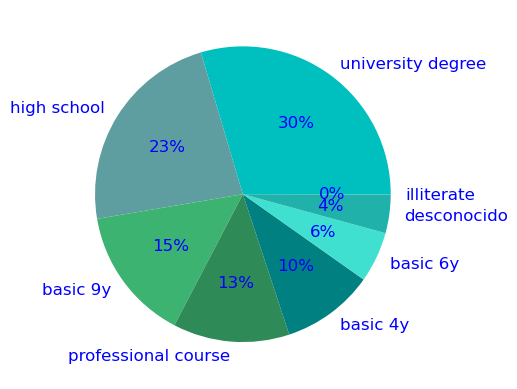

In [151]:
colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]
plt.pie(data=df_recuento, x = 'count', labels='education', autopct=  '%.0f%%', colors=colores, textprops={'fontsize': 12, 'color': 'blue'});

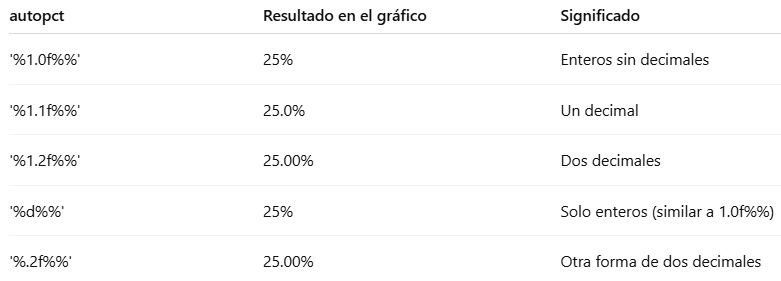

¿Qué es lo que significa eso que hemos puesto en el parámetro *autopct*?

- `'%'`: Este carácter es un literal que se traduce directamente a un signo de porcentaje (%) en la cadena formateada. Indica que el número formateado será seguido por un signo de porcentaje.

- `'1.1f'`: Especifica cómo se formateará el número. Aquí tienes una explicación más detallada:
  - `1`: El primer dígito en esta sección (antes del punto) indica el ancho mínimo total del campo. En este caso, significa que el campo tendrá al menos 1 carácter.

  - `.1`: La parte después del punto decimal indica cuántos dígitos después del punto decimal deben mostrarse. En este caso, solo se muestra un dígito después del punto decimal.

  - `f`: Indica que el número se formateará como un número de punto flotante.
 

## BIVARIABLE

# COUNTPLOT CON HUE

In [112]:
df.columns

Index(['income', 'kidhome', 'teenhome', 'dt customer', 'numwebvisitsmonth',
       'id', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'previous', 'poutcome',
       'emp var rate', 'cons price idx', 'cons conf idx', 'nr employed', 'y',
       'date', 'latitude', 'longitude', 'age', 'euribor3m'],
      dtype='object')

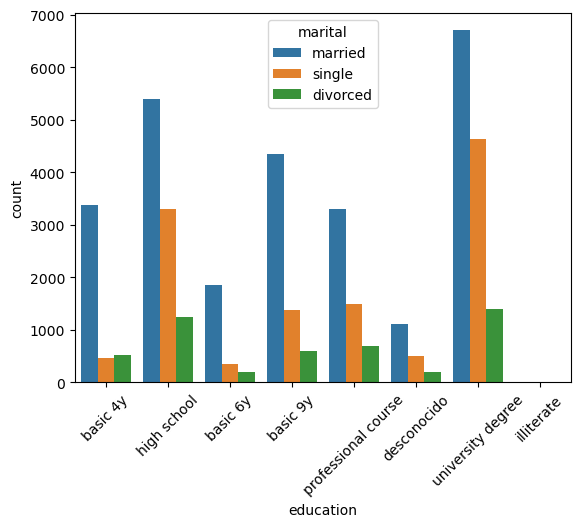

In [113]:
sns.countplot(data=df, x='education', hue = 'marital')
plt.xticks(rotation = 45);

In [114]:
df.groupby('education')['marital'].value_counts().reset_index()

# df.groupby(['education', 'marital'])['id'].count().reset_index()

,education,marital,count
0,basic 4y,married,3372
1,basic 4y,divorced,516
2,basic 4y,single,468
3,basic 6y,married,1850
4,basic 6y,single,346
5,basic 6y,divorced,190
6,basic 9y,married,4340
7,basic 9y,single,1377
8,basic 9y,divorced,592
9,desconocido,married,1117


In [115]:
pd.crosstab(df['marital'], df['education'], normalize=True)

education,basic 4y,basic 6y,basic 9y,desconocido,high school,illiterate,professional course,university degree
marital,,,,,,,,
divorced,0.012000,0.004419,0.013767,0.004442,0.028837,0.000047,0.016023,0.032349
married,0.078419,0.043023,0.100930,0.025977,0.125279,0.000349,0.076791,0.155837
single,0.010884,0.008047,0.032023,0.011605,0.076698,0.000023,0.034558,0.107674


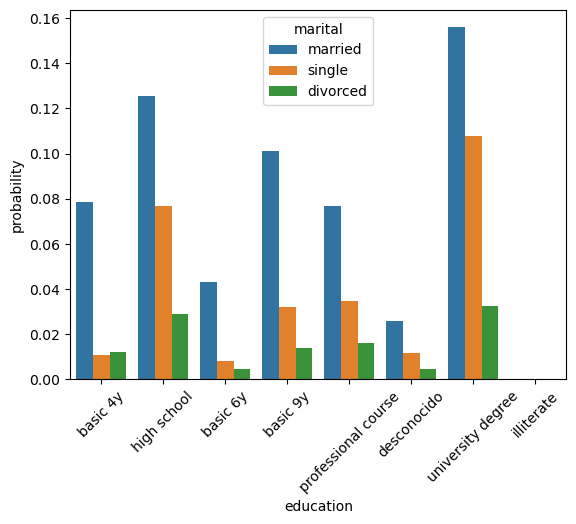

In [116]:
sns.countplot(data=df, x='education', hue = 'marital', stat='probability')
plt.xticks(rotation = 45);

## ANALISIS VARIABLES CATEGORICAS Y NUMERICAS

# BARPLOT 

Es una visualización que representa datos categóricos en el eje de las x, y numéricos en el eje de las y (media, mediana, desviacion estandar...) utilizando barras rectangulares. 

<u>Sintaxis de un barplot usando Seaborn</u>

`sns.barplot(x, y, palette, errorbar, hue)`

Donde:

- `x`: Este parámetro especifica los valores que se ubicarán en el eje X del gráfico. En este caso, categorias es una lista de etiquetas o valores categóricos que se utilizarán en el eje X del gráfico de barras.

- `y`: Este parámetro establece los valores que se mostrarán en el eje Y del gráfico. Corresponde a los valores numéricos asociados con cada categoría en el eje X.

- `palette` (opcional): Aquí definimos la paleta de colores que se utilizará para colorear las barras en el gráfico. Seaborn proporciona varias paletas predefinidas, y "Set2" es una de ellas. Puedes utilizar otras paletas predefinidas o incluso crear tus propias paletas personalizadas.

- `errorbar` (opcional): Este parámetro controla la visualización del intervalo de confianza alrededor de las barras. Al establecerlo en None, se desactiva la representación del intervalo de confianza.

- `hue` (opcional):Permite agregar una dimensión adicional al gráfico de barras al diferenciar las barras por un factor categórico adicional.

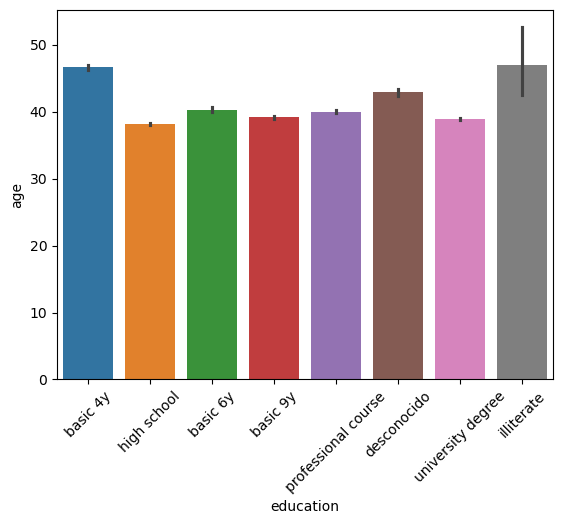

In [117]:
sns.barplot(data=df, x='education', y='age', hue='education')
plt.xticks(rotation = 45);

In [118]:
df.groupby('education')['age'].std().sort_values(ascending=False)

education
basic 4y               11.916897
desconocido            11.866375
illiterate             11.027784
professional course     9.438422
high school             9.228572
university degree       9.217952
basic 9y                9.125154
basic 6y                8.223641
Name: age, dtype: float64

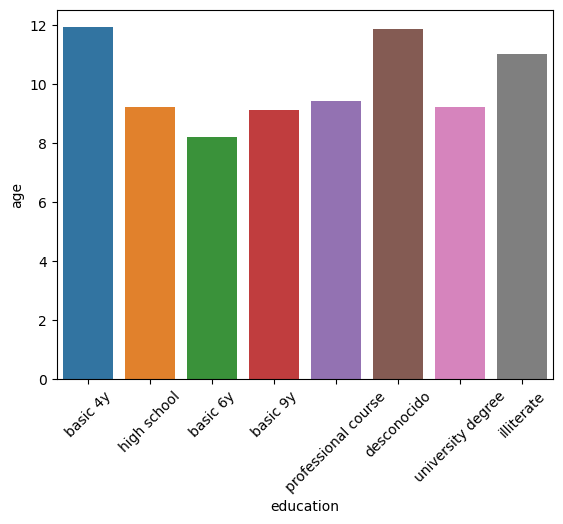

In [119]:
sns.barplot(data=df, x='education', y='age', hue='education', estimator='std', errorbar=None)
plt.xticks(rotation = 45);

In [120]:
print(sns.palettes.SEABORN_PALETTES.keys()) 

dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])


In [121]:
# en matplotlib

<u>Sintaxis de un barplot usando Matplotlib</u>

`
plt.bar(categorias, height, data , color)  
`

Donde cada parámetro significa:

- `categorias`: Representa las categorías o etiquetas en el eje X del gráfico de barras.

- `height`: Corresponde a los valores numéricos asociados con cada categoría en el eje X.

- `color` (opcional): Controla el color de las barras en el gráfico.

- `data`: Es el DataFrame del que sacaremos los datos.




In [122]:
df_barplot = df.groupby('education')['age'].mean().reset_index()

df_barplot.rename(columns={'age': 'age mean'},inplace=True)
df_barplot

,education,age mean
0,basic 4y,46.645555
1,basic 6y,40.306219
2,basic 9y,39.150613
3,desconocido,42.920729
4,high school,38.135180
5,illiterate,47.044444
6,professional course,39.994983
7,university degree,38.930247


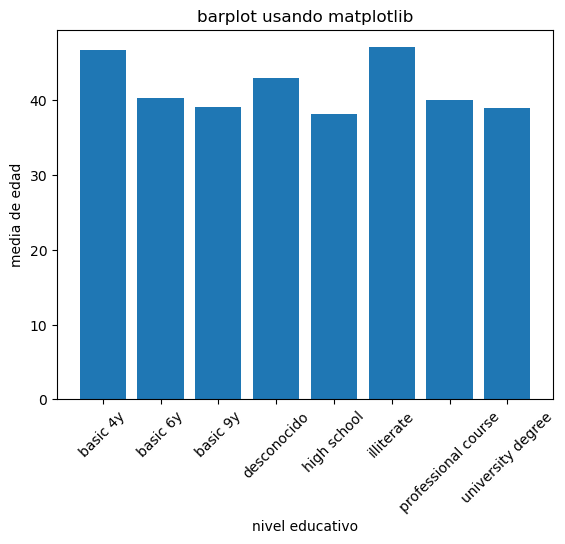

In [123]:
plt.bar(data=df_barplot, x='education', height='age mean')
plt.title('barplot usando matplotlib')
plt.xlabel('nivel educativo')
plt.ylabel('media de edad')
plt.xticks(rotation = 45);

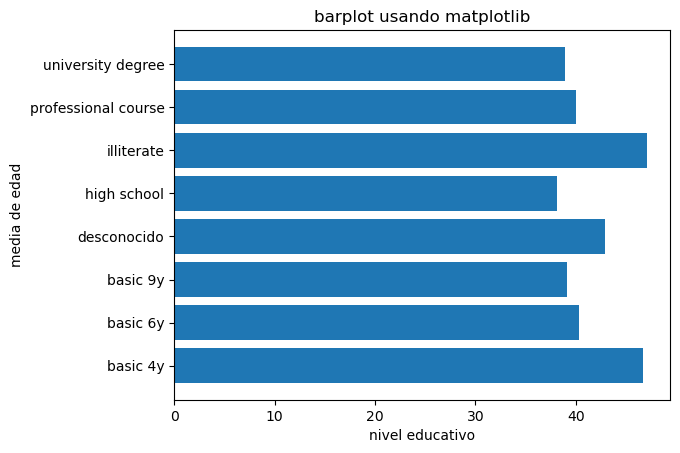

In [124]:
plt.barh(data=df_barplot, y='education', width='age mean')
plt.title('barplot usando matplotlib')
plt.xlabel('nivel educativo')
plt.ylabel('media de edad');

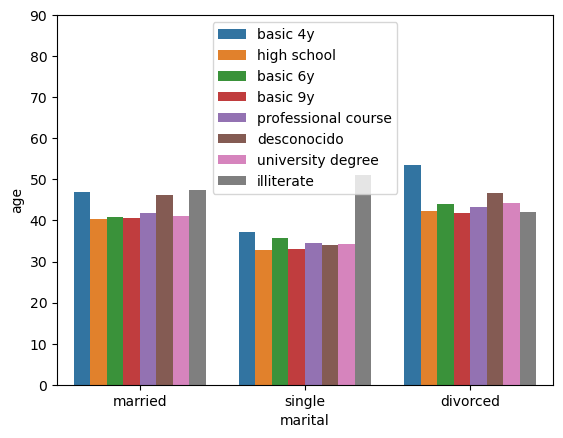

In [125]:
# En seaborn podemos añadir otra dimensión categorica con hue

sns.barplot(data = df, x='marital', y = 'age', errorbar=None, hue='education')
plt.legend(loc = 'upper center')
plt.ylim(0, 90);

In [126]:
df.groupby(['marital', 'education'])['age'].mean().reset_index()

,marital,education,age
0,divorced,basic 4y,53.539822
1,divorced,basic 6y,44.051427
2,divorced,basic 9y,41.750434
3,divorced,desconocido,46.774030
4,divorced,high school,42.338515
5,divorced,illiterate,42.000000
6,divorced,professional course,43.264399
7,divorced,university degree,44.208951
8,married,basic 4y,46.899679
9,married,basic 6y,40.759931


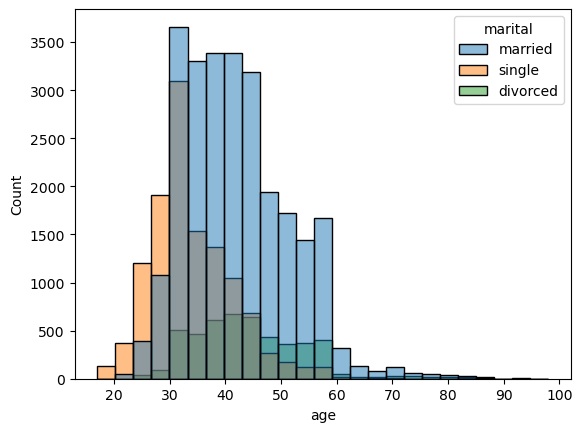

In [127]:
# hue (solo seaborn)

# # histograma

sns.histplot(data=df, x = 'age', hue='marital', bins = 25);

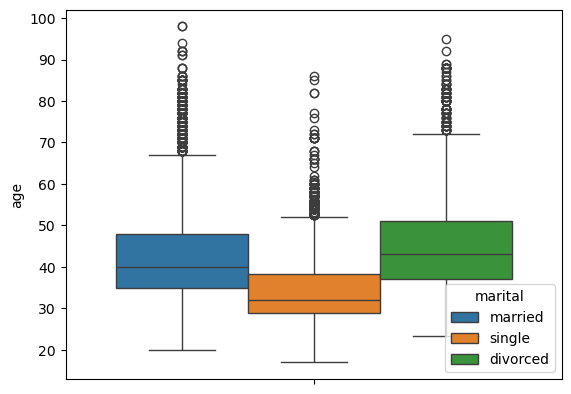

In [128]:
# boxplot y violinplot

sns.boxplot(data=df, y = 'age', hue = 'marital');

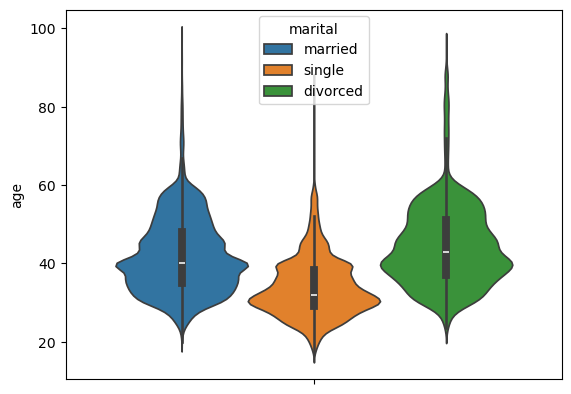

In [129]:
sns.violinplot(data=df, y = 'age', hue = 'marital');

In [142]:
sns.scatterplot?

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

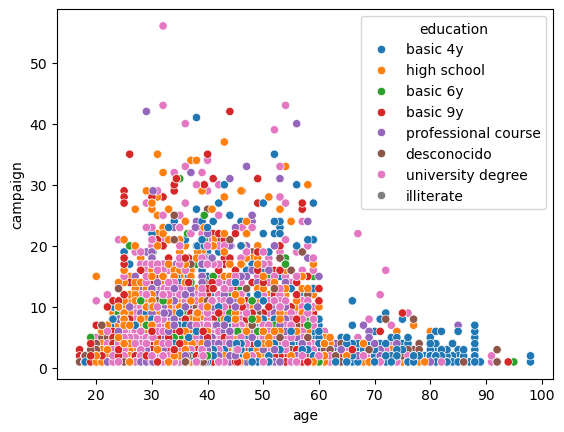

In [130]:
# scatterplot

sns.scatterplot(data=df, x = 'age', y = 'campaign', hue = 'education');

In [131]:
# regplot no existe hue. 

In [132]:
# lineplot (parecido al barplot pero formato lineas, no barras)

df['date'].head(2)

0    2019-08-02
1    2016-09-14
Name: date, dtype: object

In [133]:
df['year'] = df['date'].str.split('-').str[0]

df['year'].head(2)

0    2019
1    2016
Name: year, dtype: object

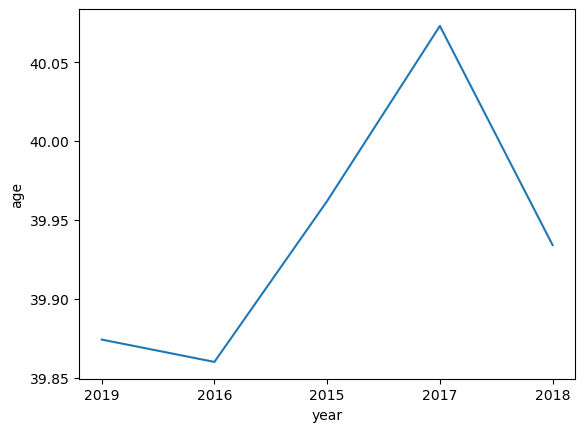

In [134]:
sns.lineplot(data=df, x = 'year', y = 'age', errorbar=None);

In [135]:
df['year'] = pd.Categorical(df['year'], categories=['2015', '2016', '2017', '2018', '2019'], ordered=True)

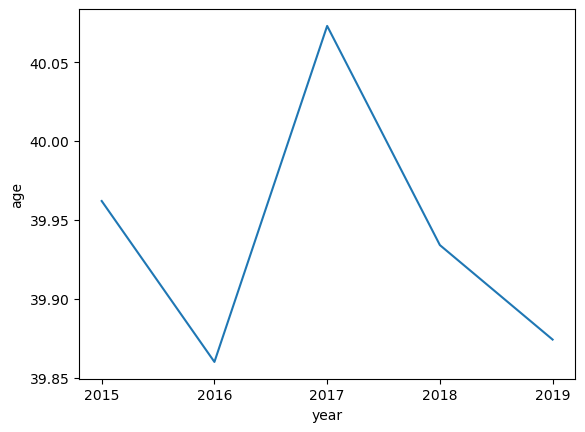

In [136]:
sns.lineplot(data=df, x = 'year', y = 'age', errorbar=None);

In [137]:
df['year'] = df['year'].astype('Int64')

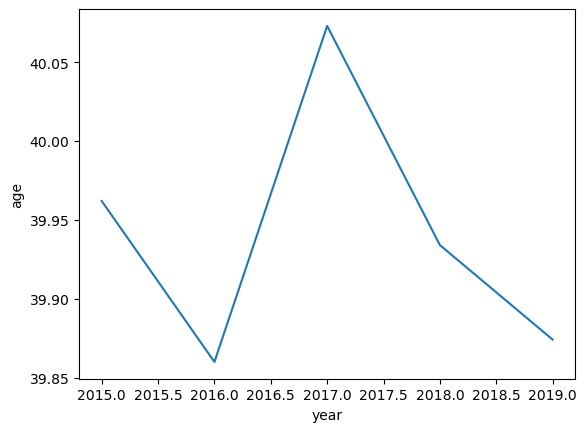

In [138]:
sns.lineplot(data=df, x = 'year', y = 'age', errorbar=None);

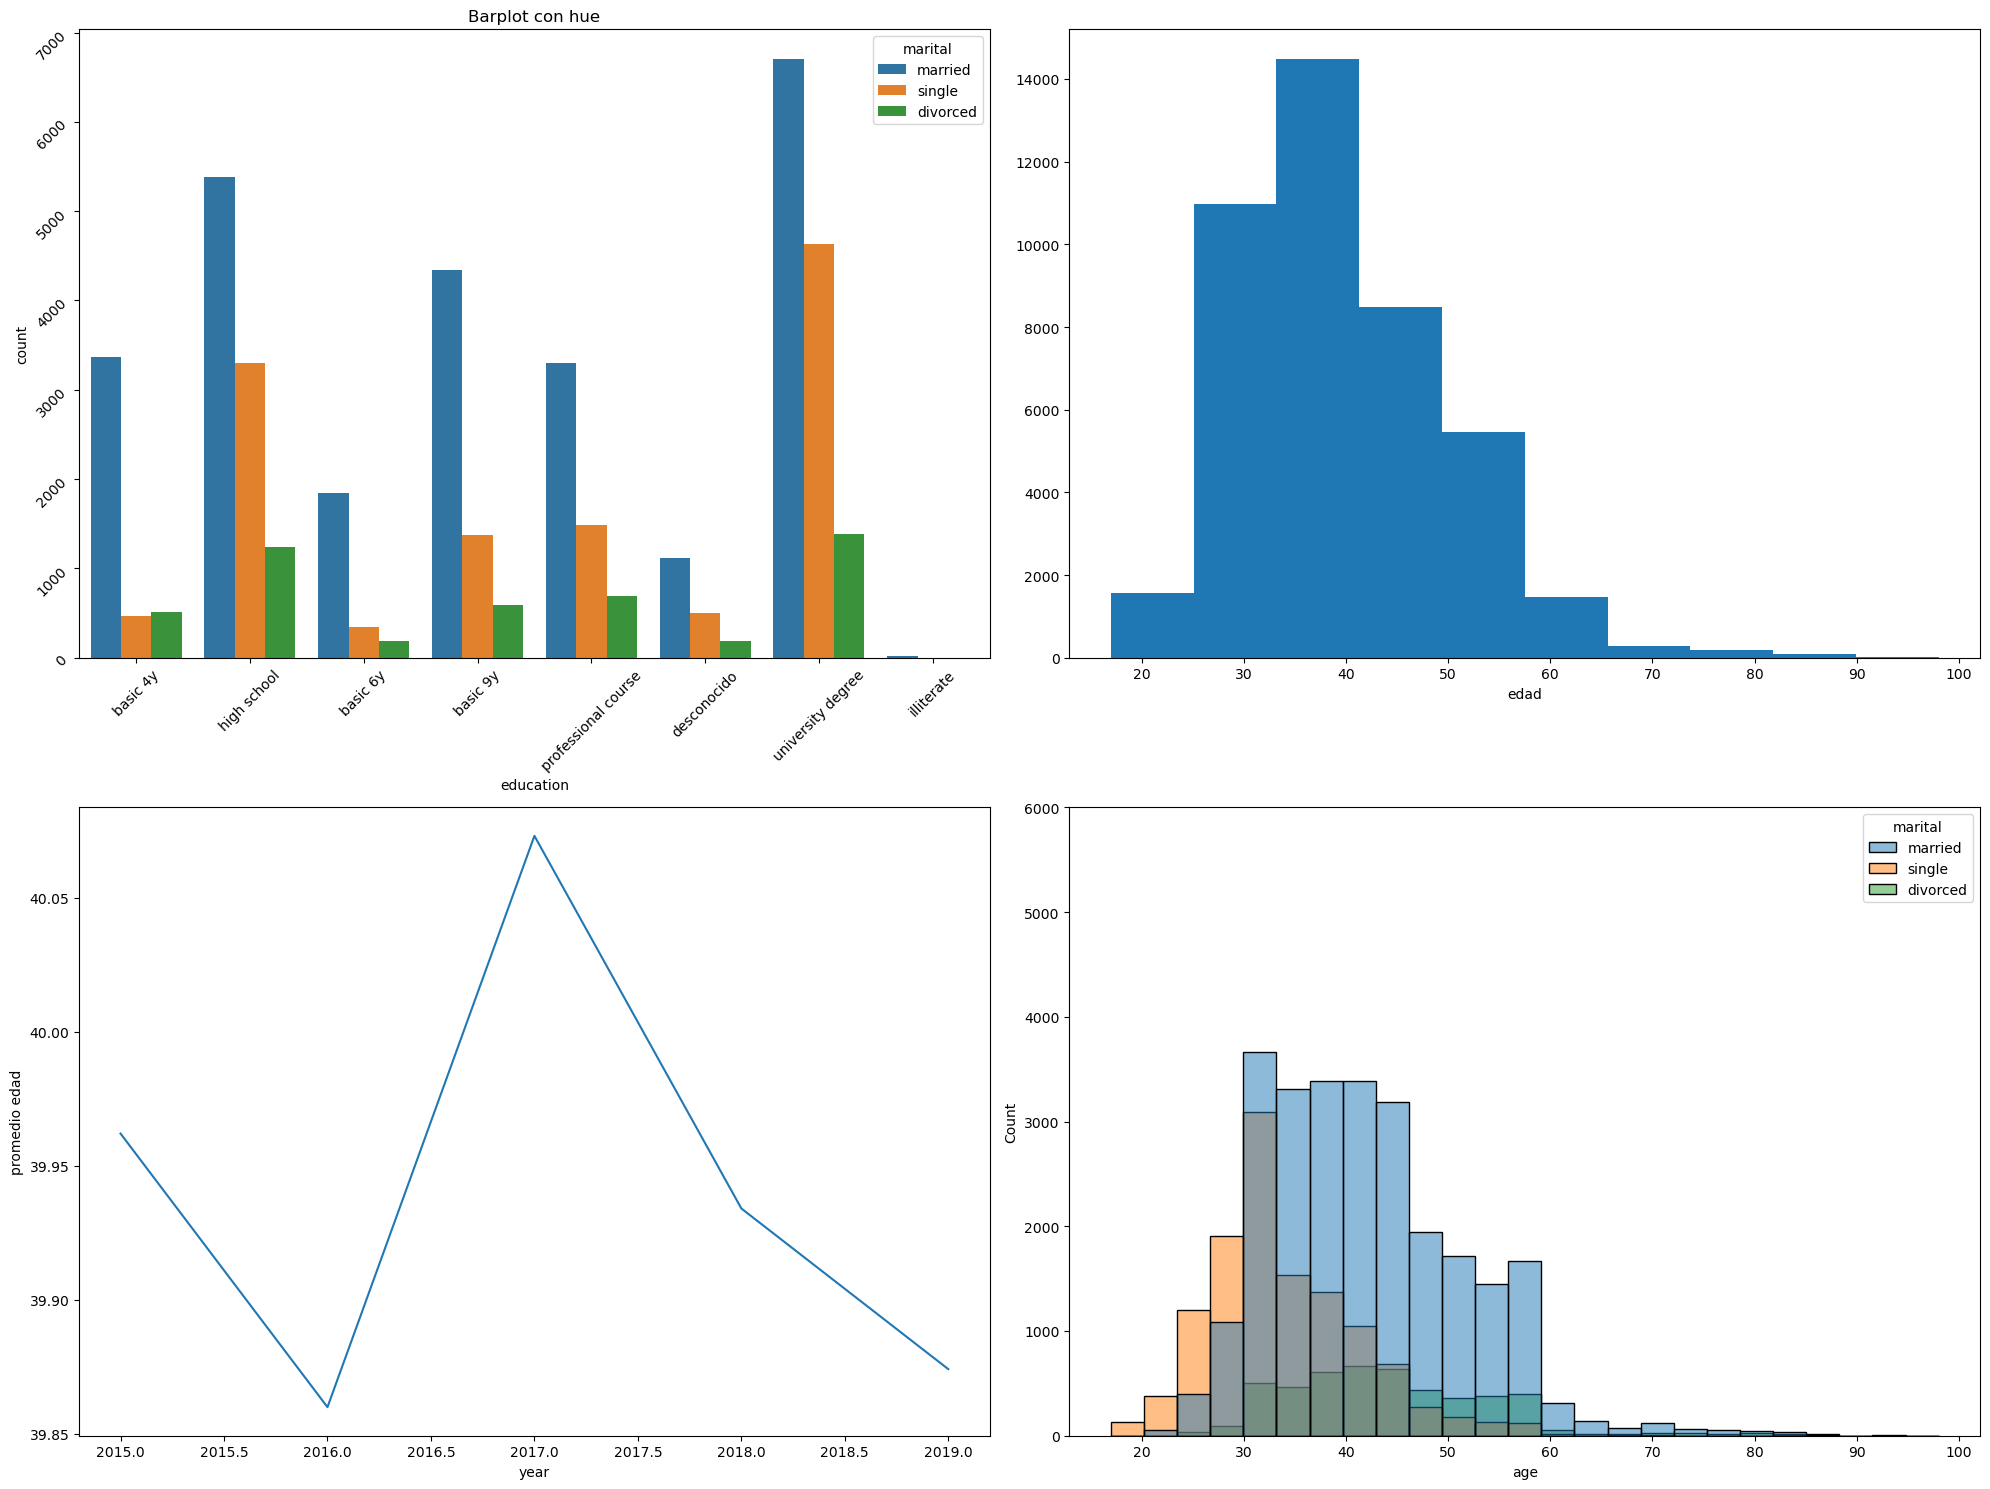

In [141]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (20,15));

sns.lineplot(data=df, x = 'year', y = 'age', errorbar=None, ax = axes[1,0]);
axes[0,1].hist(data = df, x='age')
sns.countplot(data=df, x='education', hue = 'marital', ax=axes[0,0])

sns.histplot(data=df, x = 'age', hue='marital', bins = 25, ax=axes[1,1])

axes[0,0].tick_params(rotation = 45)

axes[0,0].set_title ('Barplot con hue')
axes[0,1].set_xlabel('edad')
axes[1,0].set_ylabel('promedio edad')
axes[1,1].set_ylim(0,6000)
plt.tight_layout();
